# Titanic: Machine Learning from Disaster

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Parsing and Viewing Data

### Training Set

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


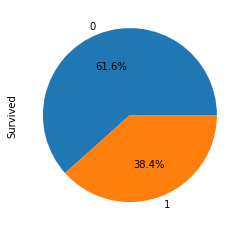

In [3]:
# Find the survival percentage
train_data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%')

### Testing Set

In [4]:
test_data = pd.read_csv('data/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Information of Datasets

In [5]:
train_data.info()
print('-' * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## Filling Missing Values for Training Set
From `train_data.info()`, we note that columns **Age**, **Cabin**, and **Embarked** have missing values.

### Data Cleaning for Cabin Feature
There are too many missing values in Cabin feature, we can consider to drop this feature. I suppose the Cabin feature does not have enough relationship to the survival.

In [6]:
# Drop Cabin feature
del train_data['Cabin']
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Filling Values for Embarked Feature
Since the Embarked feature has only 2 missing values, we will just fill these with the most common one, the mode.

In [7]:
# Find the mode of Embarked feature
mode = train_data['Embarked'].dropna().mode()
mode

0    S
dtype: object

In [8]:
# Fill the missing values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
train_data.loc[train_data['Embarked'] == 'S']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


### Filling Values for Age Feature
In this case, if we replace the missing values by one single value, such as median and mode, the data will not be balanced and even more biased. So, I create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and the number of missing values.

In [10]:
# Find the mean and standard deviation of the training set
mean = train_data['Age'].mean()
std = train_data['Age'].std()

# Count the number of missing values
num_null = train_data['Age'].isnull().sum()

# Fill missing values in Age column with random values generated
rand_age = np.random.randint(mean - std, mean + std, size = num_null)
age_slice = train_data['Age'].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_data['Age'] = age_slice
train_data['Age'] = train_data['Age'].astype(int)
train_data['Age'].isnull().sum() # It gets 0. Check the null values

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,41,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [11]:
train_data.info() # Now, all the features have no null values except the Cabin feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


## Find Relation among Different Features and Survival

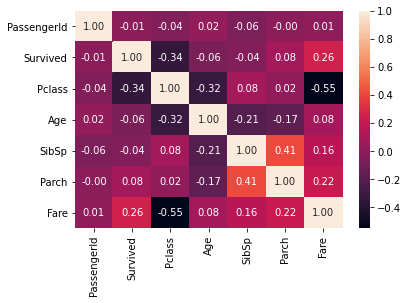

In [12]:
sns.heatmap(train_data.corr(), annot = True, fmt = ".2f")

### Is There a Relationship between Sex and Survival?

In [13]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

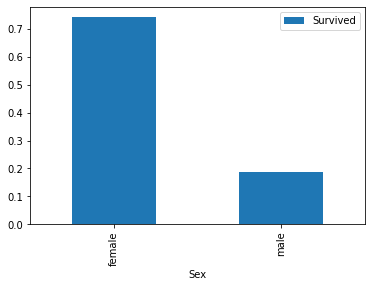

In [14]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

The bar chart gives that the survival rate of female is greater than that of male. "Ladies first" is a widely kept tradition at that time.

### Is There a Relationship between Passenger Class and Survival?

In [15]:
train_data.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

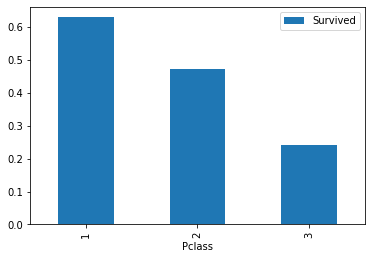

In [16]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()

We generally note that the upper passenger class has the higher survival rate. With consideration of sex feature, we get the same result that females have a higher survival rate.

In [17]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

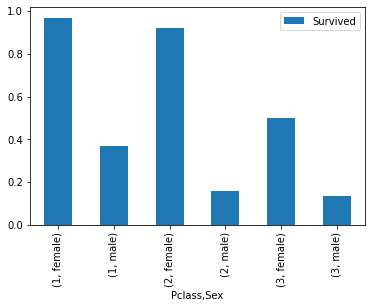

In [18]:
train_data[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean().plot.bar()

### Is There a Relationship between Age and Survival?

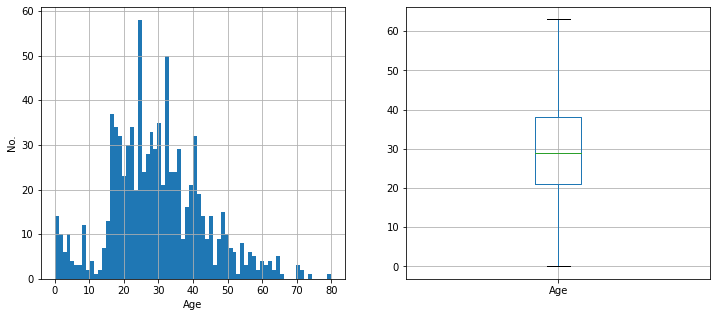

In [19]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
train_data['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('No.')

plt.subplot(122)
train_data.boxplot(column = 'Age', showfliers = False)
plt.show()

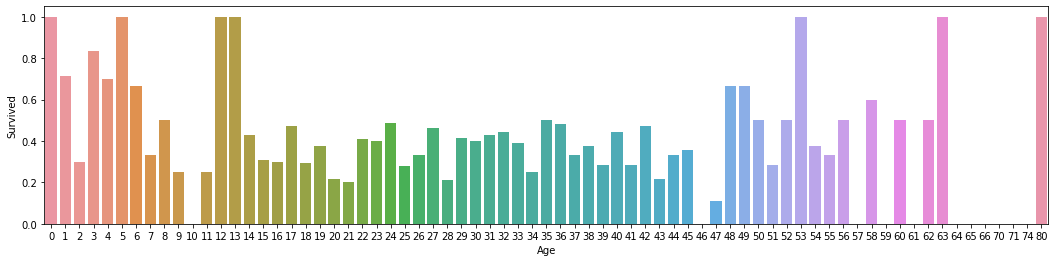

In [20]:
fig, axis1 = plt.subplots(1, 1, figsize = (18, 4))
train_data['Age'] = train_data['Age'].astype(int)
average_age_per = train_data[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()
sns.barplot(x = 'Age', y = 'Survived', data = average_age_per)

In [21]:
train_data['Age'].describe()

count    891.000000
mean      29.607183
std       13.538066
min        0.000000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.532258
(12, 18]     0.354839
(18, 65]     0.371706
(65, 100]    0.125000
Name: Survived, dtype: float64

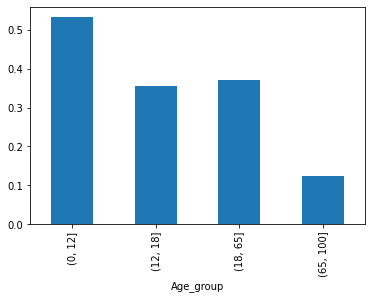

In [23]:
by_age.plot(kind = 'bar')

### Is There a Relationship between Name and Survival?

In [24]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


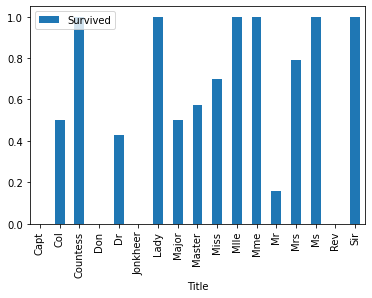

In [25]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

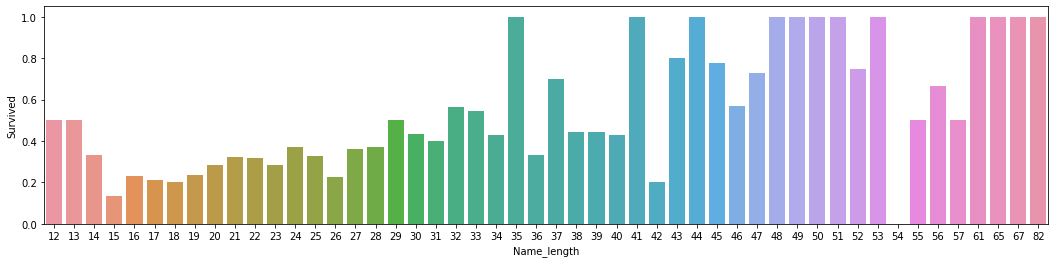

In [26]:
fig, axis1 = plt.subplots(1, 1, figsize = (18, 4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length', 'Survived']].groupby(['Name_length'],as_index = False).mean()
sns.barplot(x = 'Name_length', y = 'Survived', data = name_length)

It is hard to conclude the relationship between name and survival.

### Is There a Relationship between Siblings and Survival?

In [27]:
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

In [28]:
sibsp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Title,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,"(18, 65]",Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,"(18, 65]",Mrs,51
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,"(18, 65]",Mrs,44
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,"(0, 12]",Master,30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,"(12, 18]",Mrs,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27,1,0,SC/PARIS 2149,13.8583,C,"(18, 65]",Miss,28
869,870,1,3,"Johnson, Master. Harold Theodor",male,4,1,1,347742,11.1333,S,"(0, 12]",Master,31
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,S,"(18, 65]",Mrs,48
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,C,"(18, 65]",Mrs,37


In [29]:
no_sibsp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Title,Name_length
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,"(18, 65]",Miss,22
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,"(18, 65]",Mr,24
5,6,0,3,"Moran, Mr. James",male,20,0,0,330877,8.4583,Q,"(18, 65]",Mr,16
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,"(18, 65]",Mr,23
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,"(18, 65]",Mrs,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,Q,"(18, 65]",Mrs,36
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,"(18, 65]",Rev,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,"(18, 65]",Miss,28
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,"(18, 65]",Mr,21


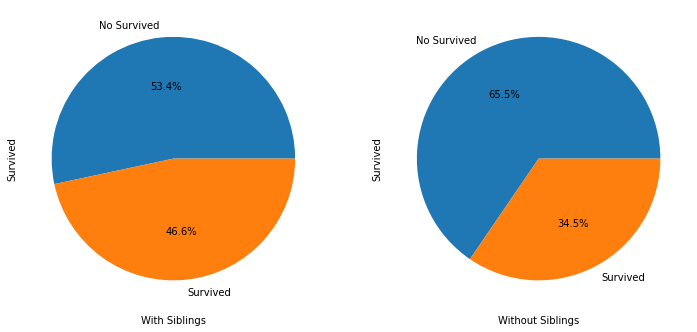

In [30]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels = ['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('With Siblings')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels = ['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('Without Siblings')

plt.show()

### Is There a Relationship between Parents/Children and Survival?

In [31]:
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

In [32]:
parch_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Title,Name_length
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,"(0, 12]",Master,30
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,"(18, 65]",Mrs,49
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,S,"(0, 12]",Miss,31
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,S,"(18, 65]",Mr,27
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,Q,"(0, 12]",Master,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,S,"(18, 65]",Mrs,48
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C,"(18, 65]",Mrs,45
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,S,"(18, 65]",Mrs,44
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,Q,"(18, 65]",Mrs,36


In [33]:
no_parch_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Title,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,"(18, 65]",Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,"(18, 65]",Mrs,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,"(18, 65]",Miss,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,"(18, 65]",Mrs,44
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,"(18, 65]",Mr,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,S,"(18, 65]",Mr,22
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,"(18, 65]",Rev,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,"(18, 65]",Miss,28
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,"(18, 65]",Mr,21


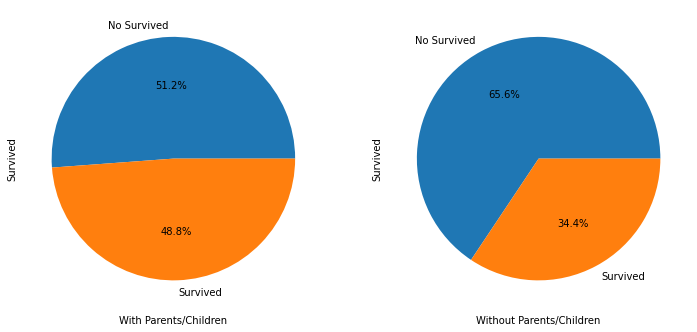

In [34]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels = ['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('With Parents/Children')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels = ['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('Without Parents/Children')

plt.show()

### Is There a Relationship between Family and Survival?

Text(0.5, 1.0, 'SibSp and Survived')

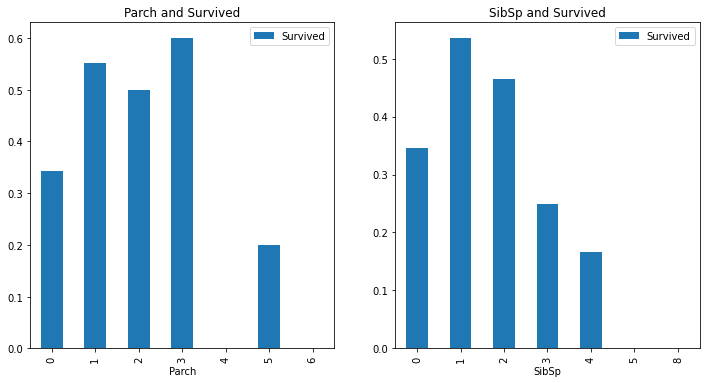

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

train_data[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Parch and Survived')

train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar(ax = ax[1])
ax[1].set_title('SibSp and Survived')

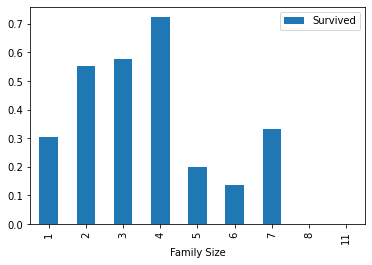

In [36]:
train_data['Family Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family Size', 'Survived']].groupby(['Family Size']).mean().plot.bar()

The plot shows that the survival rates for people alone and larger family size are low, but for the average size family (like 2 to 4 members), their survival rates tend to be higher.

### Is There a Relationship between Fare and Survival?

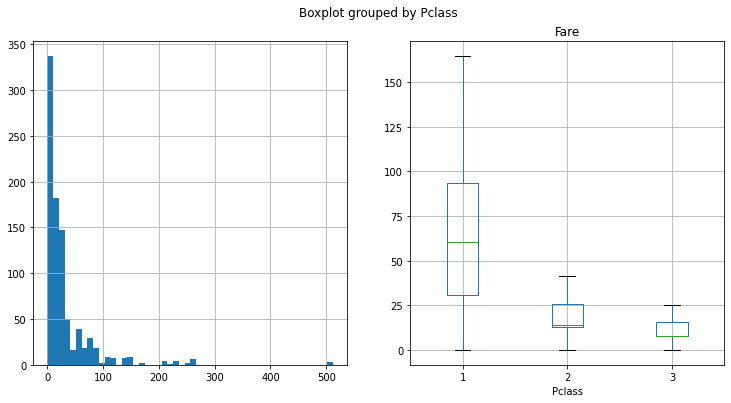

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
train_data['Fare'].hist(bins = 50, ax = ax[0])
train_data.boxplot(column = 'Fare', by = 'Pclass', ax = ax[1], showfliers = False)
plt.show()

In [38]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

In [40]:
fare_not_survived

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [41]:
fare_survived

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

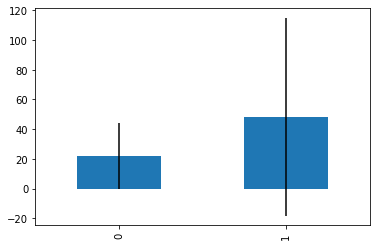

In [42]:
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.std()])
average_fare.plot(yerr = std_fare, kind = 'bar', legend = False)

plt.show()

The plot above gives that the fares survivors give tend to be greater than those others give.

### Is There a Relationship between Embark and Survival?

Text(0.5, 1.0, 'Embark and Survival')

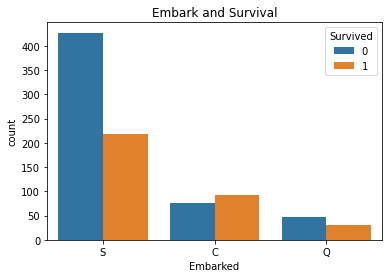

In [43]:
sns.countplot('Embarked', hue = 'Survived', data = train_data)
plt.title('Embark and Survival')

In [46]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


The Titanic departed from Southampton Port in the United Kingdom and passed through Cherbourg, France and Queenstown, Ireland. Those who boarded the ship before Queenstown may disembark at Cherbourg or Queenstown. These people would not meet To shipwreck.

Also, the survival rates vary from port to port. The people who embarked at Cherbourg have the highest possibility to survive, while the people who embarked at Southampton Port have the lowest possibility to survive. Also, applying the Central Limit Theorem, if these samples are randomly selected, the result we get is representative.

## Building Models

In [47]:
X_train = train_data.drop('Survived', axis = 1)
Y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis = 1).copy()